In [16]:
import pandas as pd
from io import StringIO
import os
import matplotlib.pyplot as plt

In [2]:
def read_trace(trace_dir, trace_file, worker_id=None):
    trace_filepath = os.path.join(trace_dir, trace_file)
    
    with open(trace_filepath,"r") as rf:
        new_trace = StringIO()
        line = rf.readline()
        while line:
            line_list = line.split()
            if line_list[0] == "[trace]":
                new_trace.write(line)
            line = rf.readline()
       
    new_trace.seek(0)
    df = pd.read_csv(new_trace, sep=" ", names=["InfoType", "EventType", "EventState", "ID", "Time"])
    del df["InfoType"]
    
    if worker_id is not None:
        df.insert(0, "WorkerID", worker_id)
        
    new_trace.close()
    
    return df

In [3]:
trace_dir = "/home/posheng/billy_ws/fl_025/paslab/trace/async2_fl_mp_3rm/resnet_50"
coord_trace_file = "coord.txt"
hpc0_trace_file = "hpc0.txt"
hpc1_trace_file = "hpc1.txt"
hpc2_trace_file = "hpc2.txt"

In [4]:
coord_df = read_trace(trace_dir, coord_trace_file)
w0_df = read_trace(trace_dir, hpc0_trace_file, "alice")
w1_df = read_trace(trace_dir, hpc1_trace_file, "bob")
w2_df = read_trace(trace_dir, hpc2_trace_file, "charlie")

hpc1_df = w0_df
hpc2_df = w1_df
hpc3_df = w2_df

worker_dfs = {
    "alice": hpc1_df,
    "bob": hpc2_df,
    "charlie": hpc3_df
}

In [10]:
def get_worker_duration(worker_id, worker_dfs, event_type):
    worker_df = worker_dfs[worker_id]
    worker_event_df = worker_df[worker_df["EventType"].str.contains(event_type, regex=False)]
    worker_event_df = worker_event_df.reset_index()
    
    del worker_event_df['index']
    del worker_event_df['ID']
    
    return worker_event_df

def get_coord_duration(coord_df, event_type):
    coord_event_df = coord_df[coord_df["EventType"].str.contains(event_type, regex=False)]
    coord_event_df = coord_event_df.reset_index()
    
    del coord_event_df['index']
    del coord_event_df['ID']
    
    return coord_event_df

def calculate_duration(event_type, df):
    event_df = df[df["EventType"] == event_type][["EventType", "EventState", "ID", "Time"]]
    event_start_df = event_df[event_df["EventState"] == "start"][["ID", "Time"]]
    event_start_df = event_start_df.reset_index()

    event_end_df = event_df[event_df["EventState"] == "end"][["Time"]]
    event_end_df = event_end_df.reset_index()
    
    event_df_cat = pd.concat([event_start_df, event_end_df], axis=1)
    del event_df_cat['index']
    event_df_cat.columns = ["ID", "StartTime", "EndTime"]
    
    event_df_cat["Duration"] = event_df_cat.apply(lambda x: x["EndTime"] - x["StartTime"], axis=1)
    event_df_cat.insert(0, "EventType", event_type)
    return event_df_cat

def get_coord_global_send_duration(coord_df, worker_id):
    coord_event_df = coord_df[coord_df["EventType"].str.contains("GlobalInformationSend", regex=False)]
    coord_event_df = coord_event_df[coord_event_df["ID"] == worker_id]
    coord_event_df = coord_event_df.reset_index()
    
    del coord_event_df['index']
    
    return coord_event_df

def get_coord_fitsagg_duration(coord_df, worker_id):
    coord_event_df = coord_df[coord_df["EventType"].str.contains("FitSagg", regex=False)]
    coord_event_df = coord_event_df[coord_event_df["ID"] == worker_id]
    coord_event_df = coord_event_df.reset_index()
    
    del coord_event_df['index']
    
    return coord_event_df

## GIS

### Model Size

In [15]:
values = {
    "original": 0.32,
    "resnet_18": 8.66,
    "resnet_34": 16.4,
    "resnet_50": 17.6
}

<BarContainer object of 4 artists>

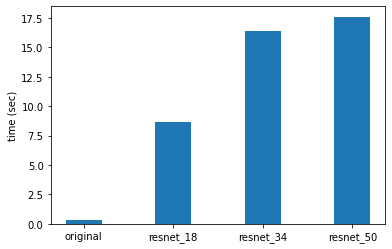

In [26]:
fig = plt.figure()
plt.ylabel("time (sec)")
plt.bar(list(values.keys()), list(values.values()), width = 0.4)

### Bandwidth

In [33]:
values = {
    10: 4.65,
    100: 0.765,
    500: 0.35,
    1000: 0.32
}

Text(0, 0.5, 'time (sec)')

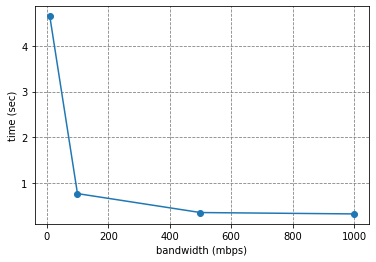

In [40]:
# x axis values 
x = list(values.keys())
# corresponding y axis values 
y = list(values.values())

plt.rc('grid', linestyle="--", color='gray')
plt.grid()
  
# plotting the points  
plt.plot(x, y, marker='o') 
  
# naming the x axis 
plt.xlabel('bandwidth (mbps)') 
# naming the y axis 
plt.ylabel('time (sec)') 
# giving a title to my graph 
# plt.title('My first graph!') 

## EMP

### Model Size

<BarContainer object of 4 artists>

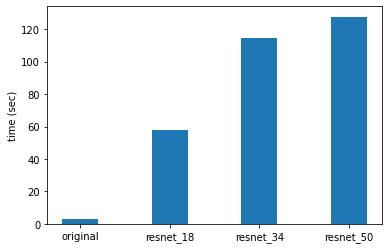

In [41]:
values = {
    "original": 2.74,
    "resnet_18": 58,
    "resnet_34": 114.9,
    "resnet_50": 127.7
}

fig = plt.figure()
plt.ylabel("time (sec)")
plt.bar(list(values.keys()), list(values.values()), width = 0.4)

### Bandwidth

Text(0, 0.5, 'time (sec)')

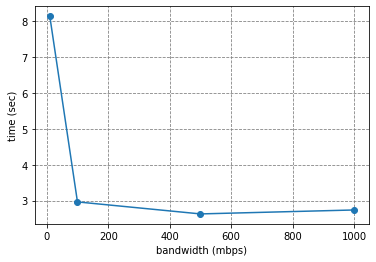

In [42]:
values = {
    10: 8.144,
    100: 2.965,
    500: 2.63,
    1000: 2.74
}

# x axis values 
x = list(values.keys())
# corresponding y axis values 
y = list(values.values())

plt.rc('grid', linestyle="--", color='gray')
plt.grid()
  
# plotting the points  
plt.plot(x, y, marker='o') 
  
# naming the x axis 
plt.xlabel('bandwidth (mbps)') 
# naming the y axis 
plt.ylabel('time (sec)') 

## AGG

### Model Size

<BarContainer object of 4 artists>

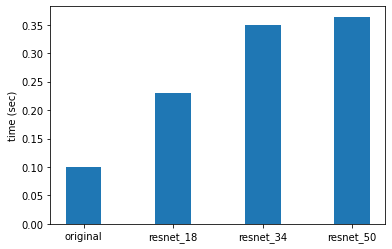

In [43]:
values = {
    "original": 0.1,
    "resnet_18": 0.23,
    "resnet_34": 0.35,
    "resnet_50": 0.364
}

fig = plt.figure()
plt.ylabel("time (sec)")
plt.bar(list(values.keys()), list(values.values()), width = 0.4)

### Bandwidth

Text(0, 0.5, 'time (sec)')

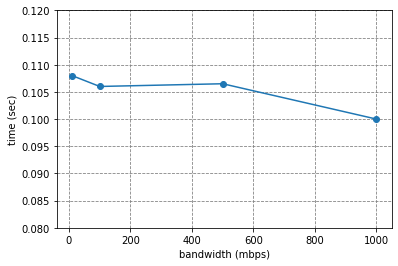

In [49]:
values = {
    10: 0.108,
    100: 0.106,
    500: 0.1065,
    1000: 0.1
}

# x axis values 
x = list(values.keys())
# corresponding y axis values 
y = list(values.values())

plt.rc('grid', linestyle="--", color='gray')
plt.grid()
  
# plotting the points  
plt.ylim(0.08, 0.12)
plt.plot(x, y, marker='o') 
  
# naming the x axis 
plt.xlabel('bandwidth (mbps)') 
# naming the y axis 
plt.ylabel('time (sec)') 

## DEC

### Model Size

<BarContainer object of 4 artists>

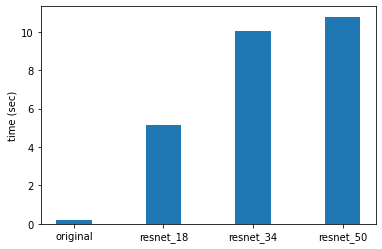

In [50]:
values = {
    "original": 0.1774,
    "resnet_18": 5.166,
    "resnet_34": 10.04,
    "resnet_50": 10.78
}

fig = plt.figure()
plt.ylabel("time (sec)")
plt.bar(list(values.keys()), list(values.values()), width = 0.4)

### Bandwidth

Text(0, 0.5, 'time (sec)')

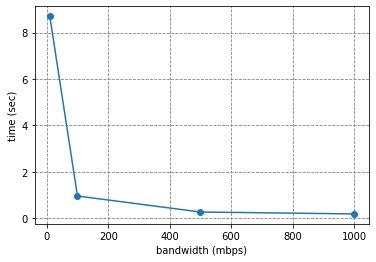

In [53]:
values = {
    10: 8.706,
    100: 0.95,
    500: 0.26,
    1000: 0.1774
}

# x axis values 
x = list(values.keys())
# corresponding y axis values 
y = list(values.values())

plt.rc('grid', linestyle="--", color='gray')
plt.grid()
  
# plotting the points  
plt.plot(x, y, marker='o') 
  
# naming the x axis 
plt.xlabel('bandwidth (mbps)') 
# naming the y axis 
plt.ylabel('time (sec)') 